In [11]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

notebook_name = 'graphical_uni_analysis.ipynb'

current_dir = os.path.dirname(os.path.abspath(notebook_name))
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))


sys.path.insert(1, parent_dir)
from src.data_processer import TelecomDataProcessor

In [3]:
# Replace 'your_conn_params' with your actual connection parameters
conn_params = {
    'host': 'localhost',
    'port': 5432,
    'user': 'ekru',
    'password': 'ekram12345',
    'database': 'tellco',
}

telecom_data_processor = TelecomDataProcessor(conn_params)


In [4]:
df = telecom_data_processor.load_dataset()

/home/ekram/Desktop/week-1/user_analytics_in_the_telecommunication_industry/src/data_processer.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [5]:
cleaned_df = telecom_data_processor.clean_dataset(df)

/home/ekram/Desktop/week-1/user_analytics_in_the_telecommunication_industry/src/data_processer.py:88: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


           Bearer Id            Start  Start ms              End     End ms  \
0       1.311448e+19   4/4/2019 12:01  770.0000  4/25/2019 14:35  662.00000   
1       1.311448e+19   4/9/2019 13:04  235.0000   4/25/2019 8:15  606.00000   
2       1.311448e+19   4/9/2019 17:42    1.0000  4/25/2019 11:58  652.00000   
3       1.311448e+19   4/10/2019 0:31  486.0000   4/25/2019 7:36  171.00000   
4       1.311448e+19  4/12/2019 20:10  565.0000  4/25/2019 10:40  954.00000   
...              ...              ...       ...              ...        ...   
149996  7.277826e+18   4/29/2019 7:28  451.0000   4/30/2019 6:02  214.00000   
149997  7.349883e+18   4/29/2019 7:28  483.0000  4/30/2019 10:41  187.00000   
149998  1.311448e+19   4/29/2019 7:28  283.0000  4/30/2019 10:46  810.00000   
149999  1.311448e+19   4/29/2019 7:28  696.0000  4/30/2019 10:40  327.00000   
150000  1.013887e+19             None  499.1882             None  498.80088   

           Dur. (ms)          IMSI  MSISDN/Number  

In [6]:
telecom_data_processor.overview_analysis(cleaned_df)

          BEARER_ID       START_MS         END_MS     DUR._(MS)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.883600e+18     288.610872     288.096693  8.103735e+04  2.144722e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/NUMBER          IMEI  AVG_RTT_DL_(MS)  AVG_RTT_UL_(MS)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.438731e+12  2.237359e+13       559.342620   

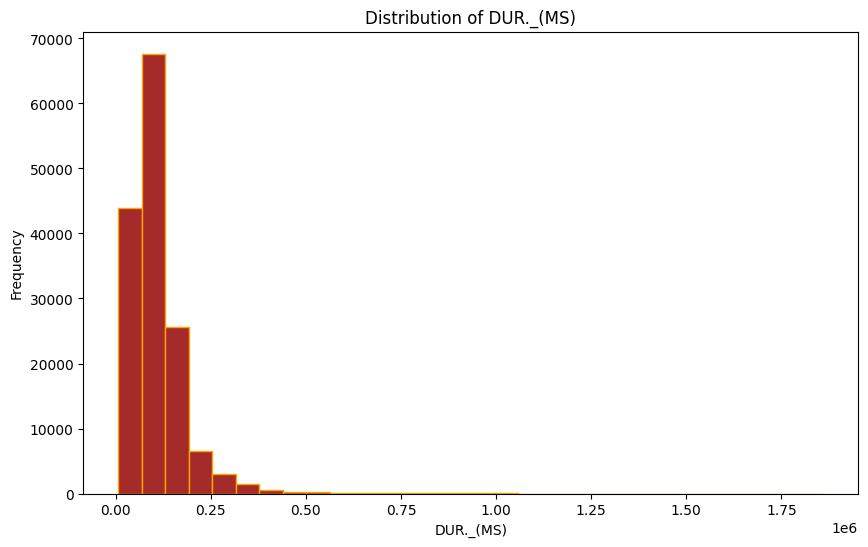

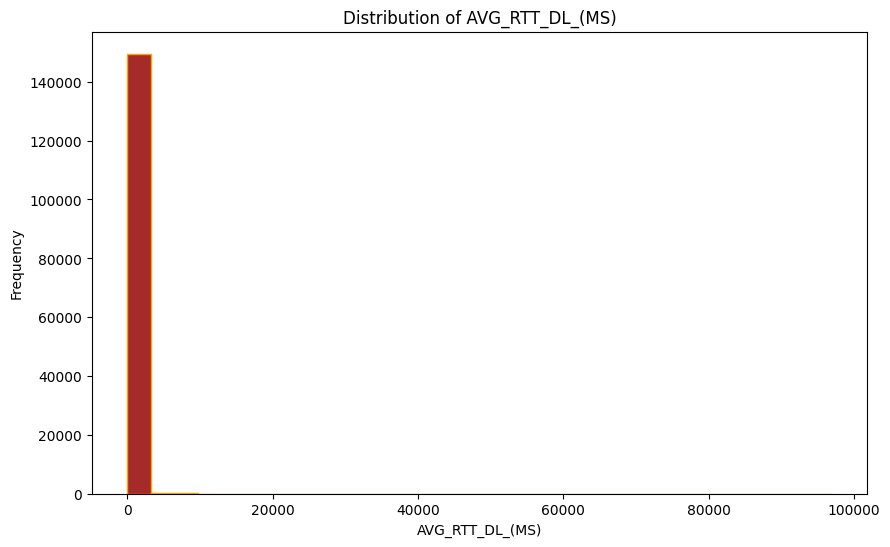

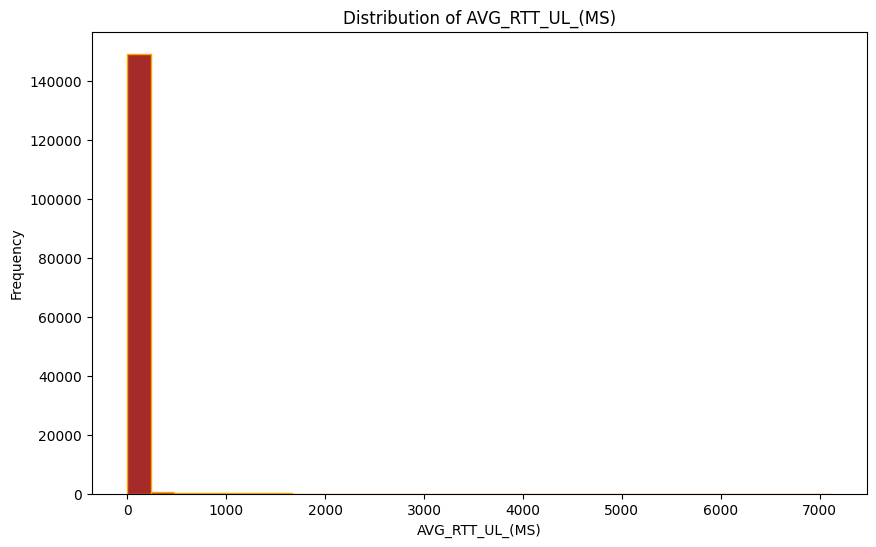

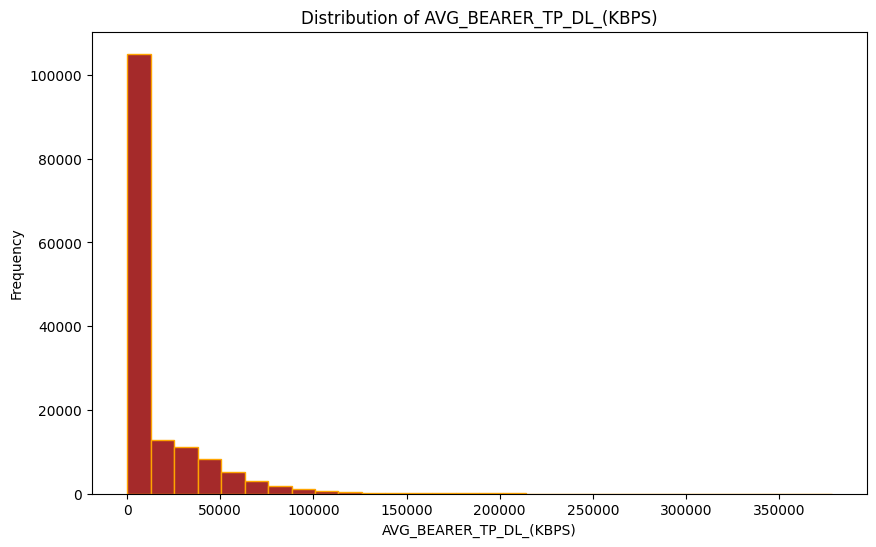

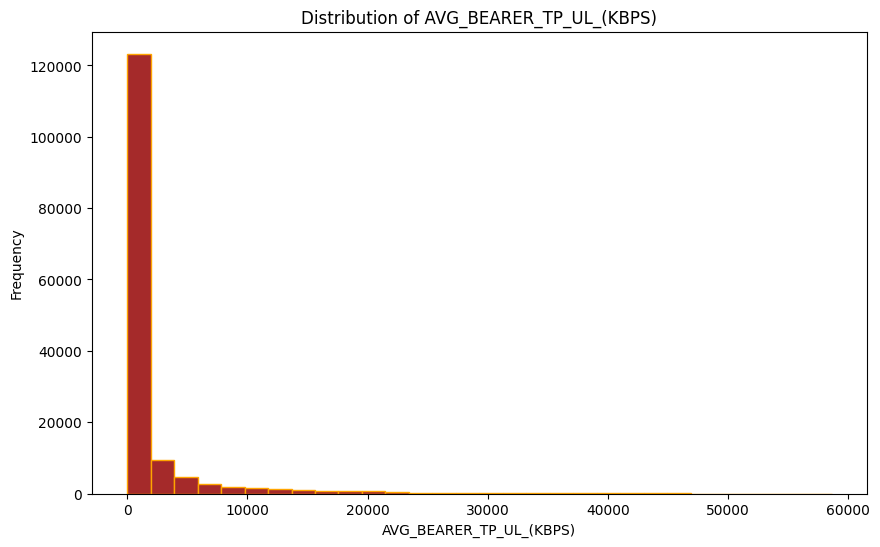

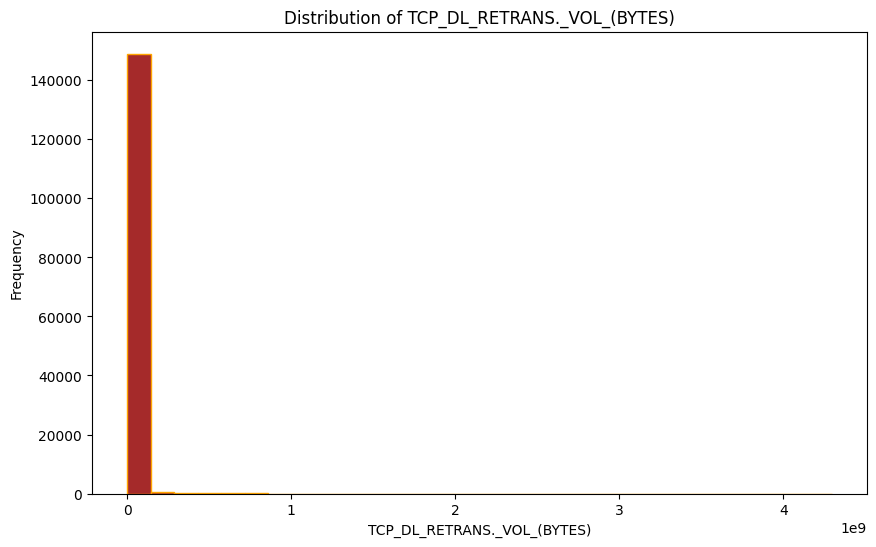

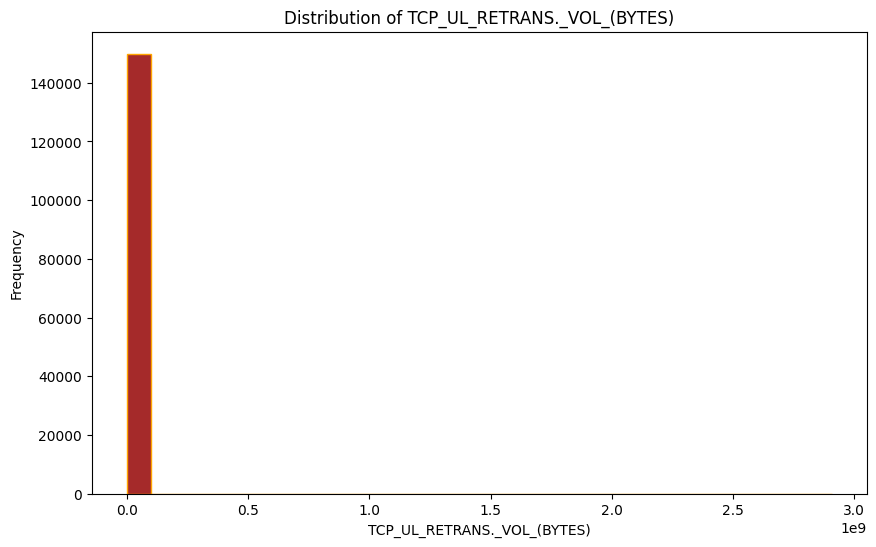

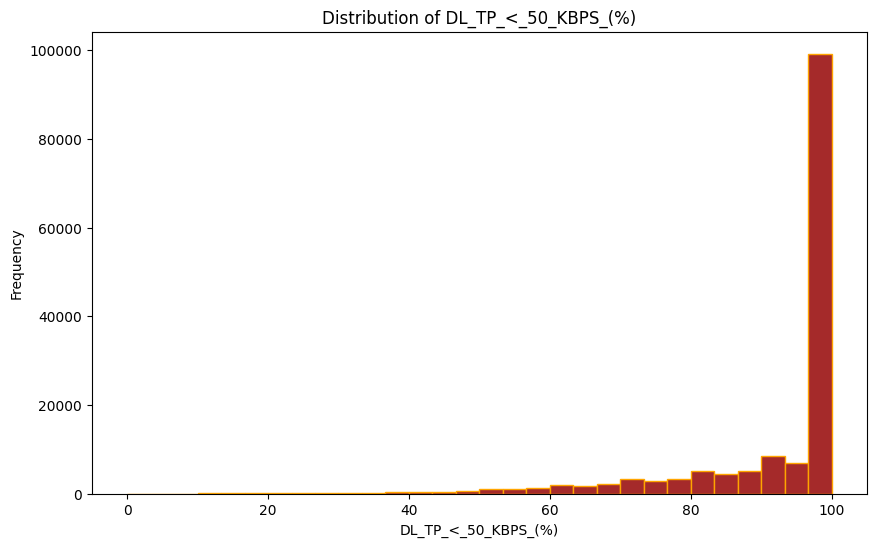

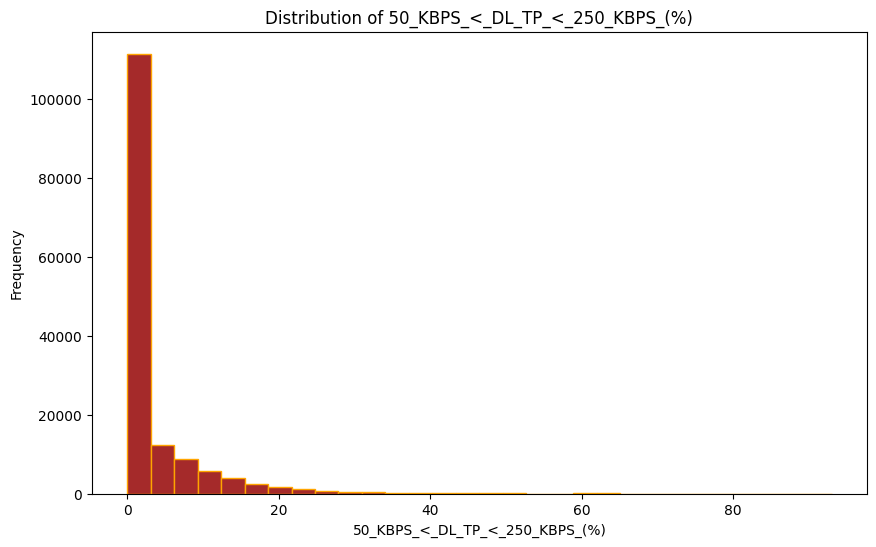

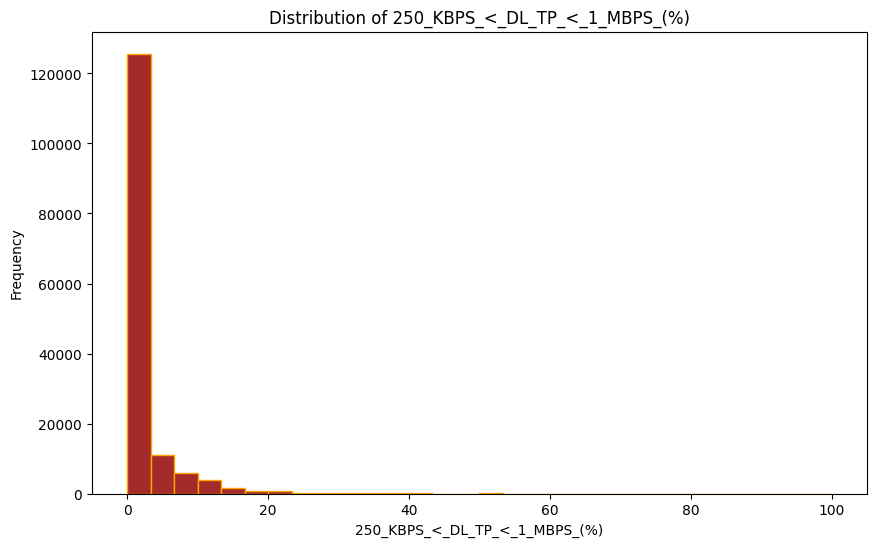

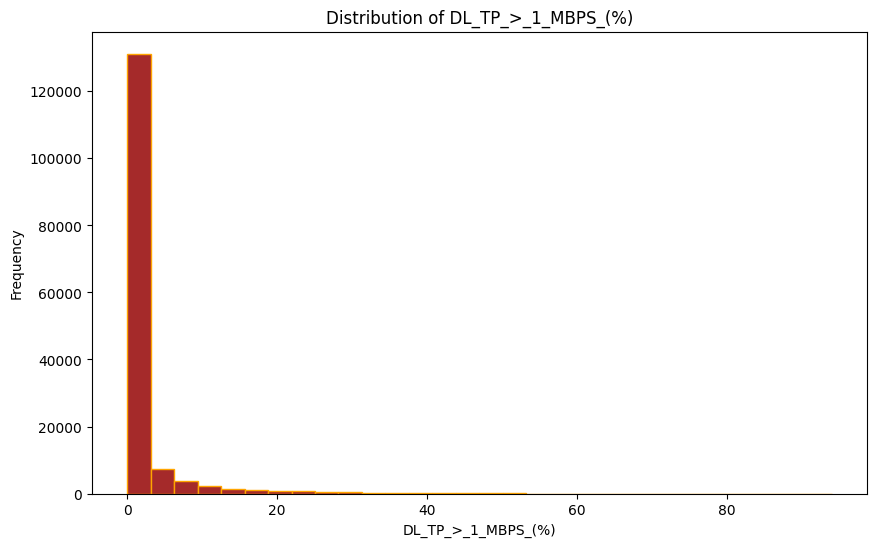

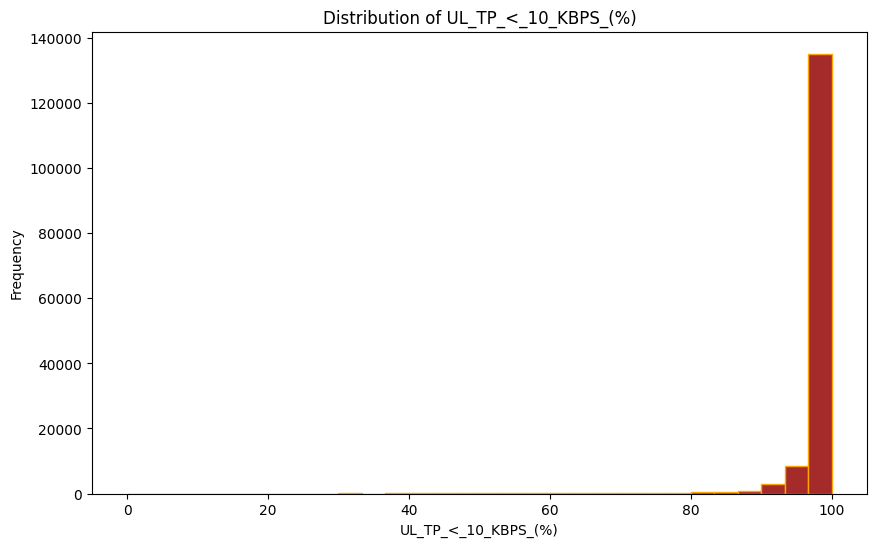

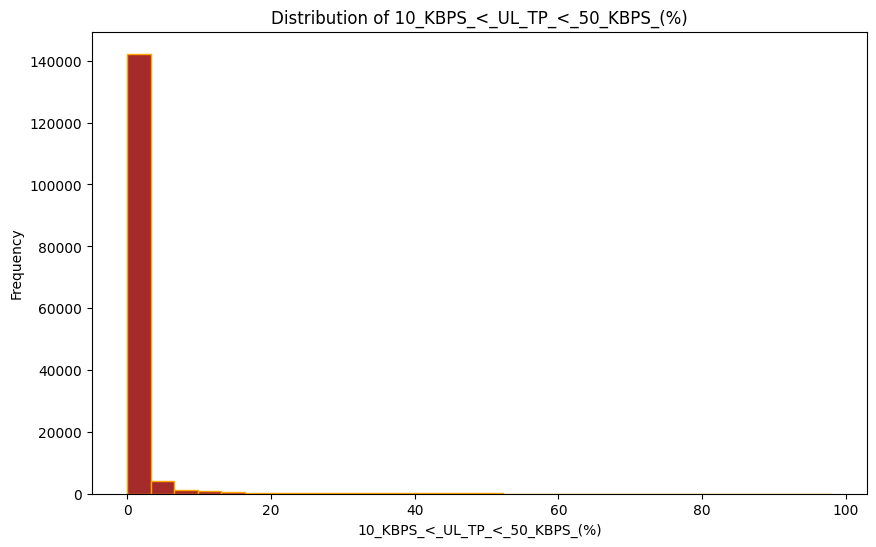

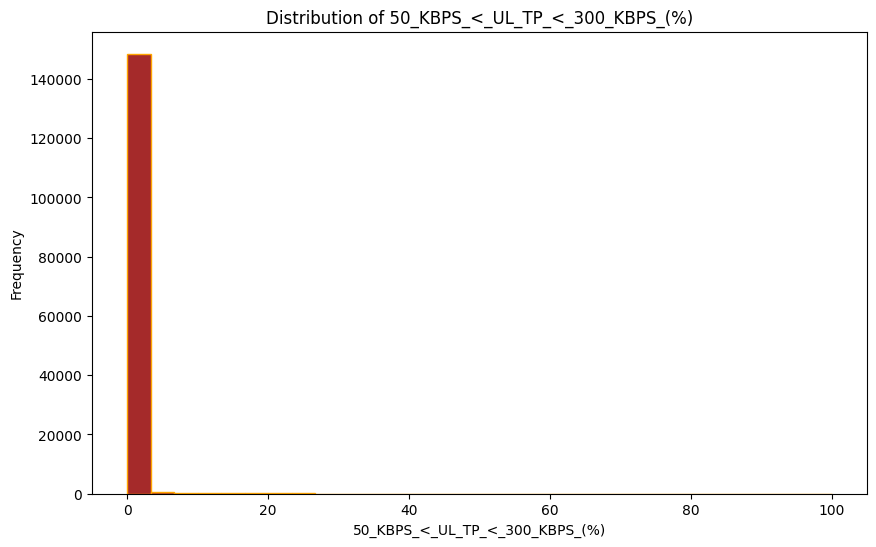

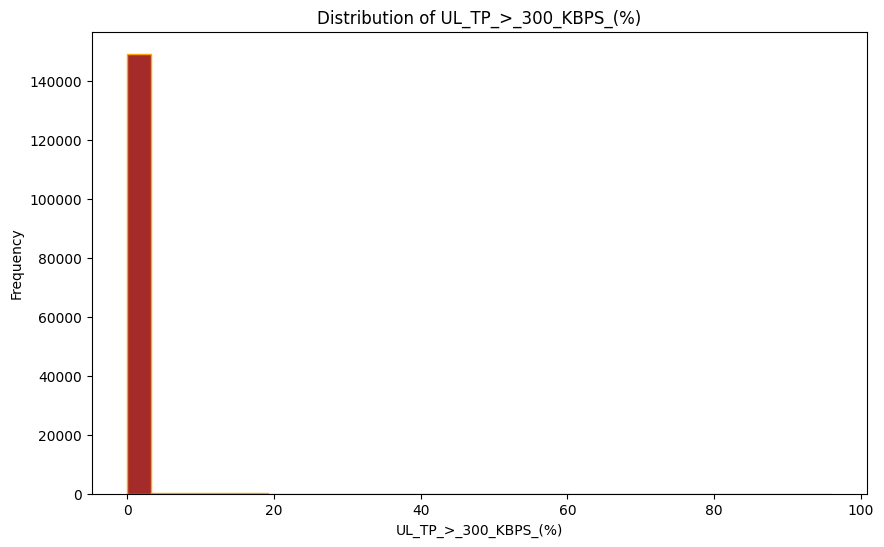

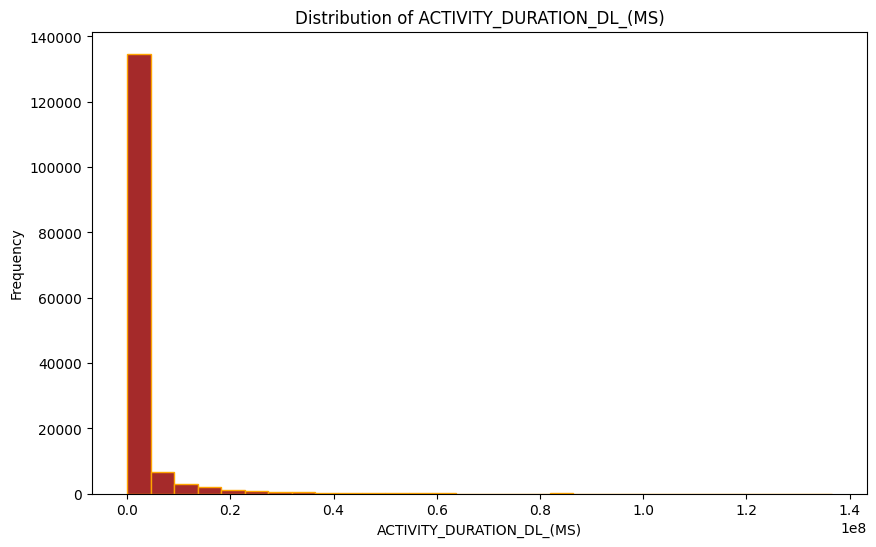

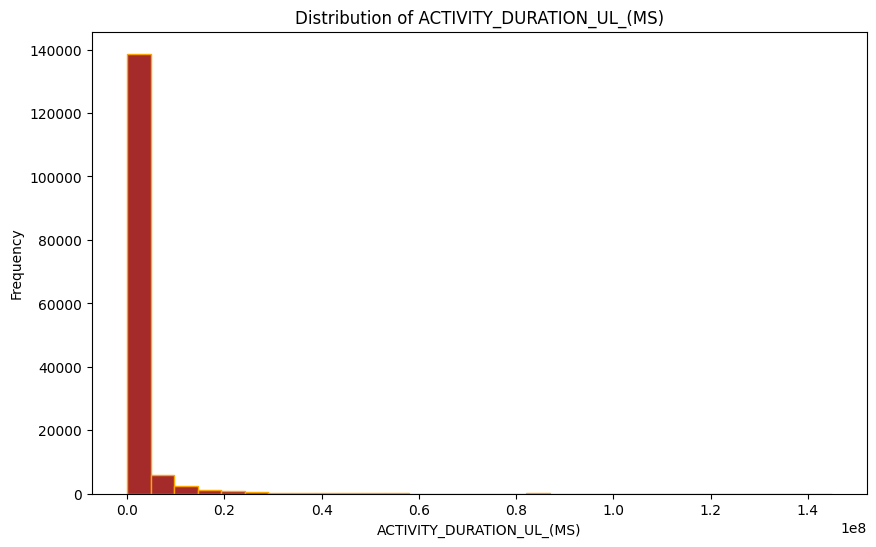

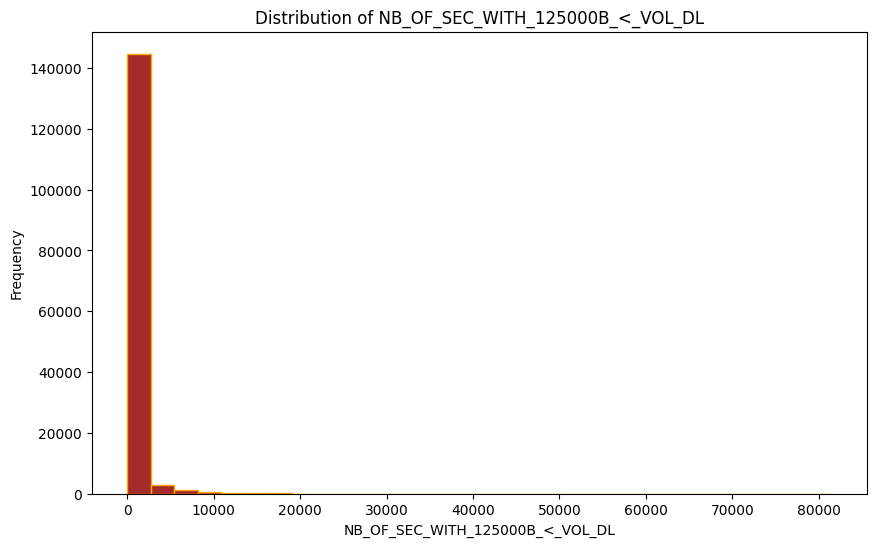

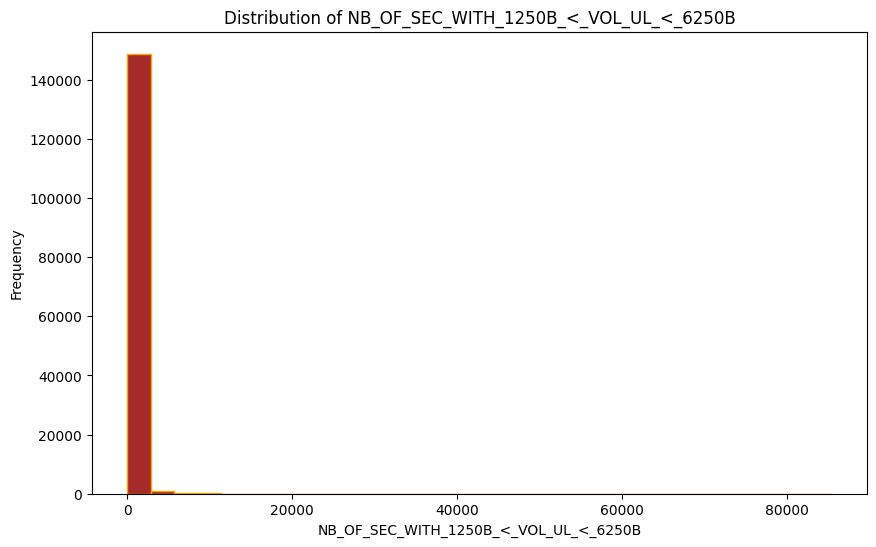

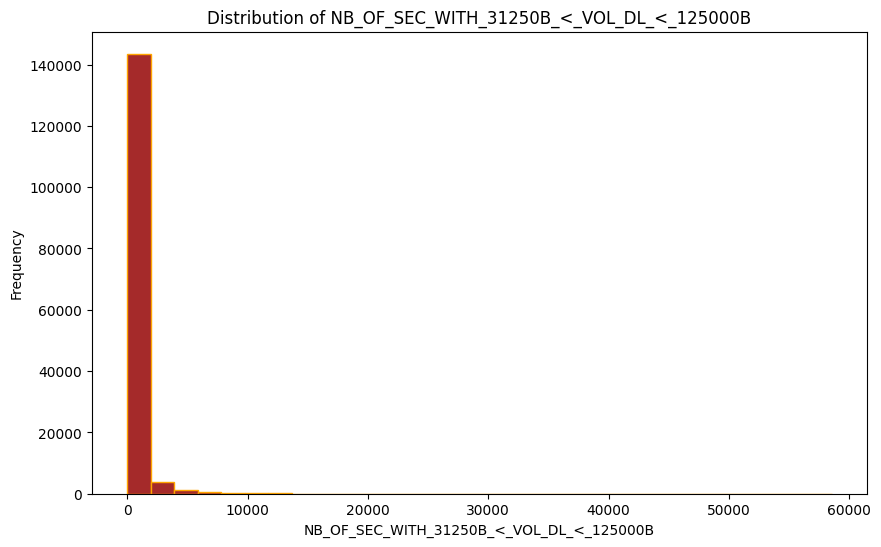

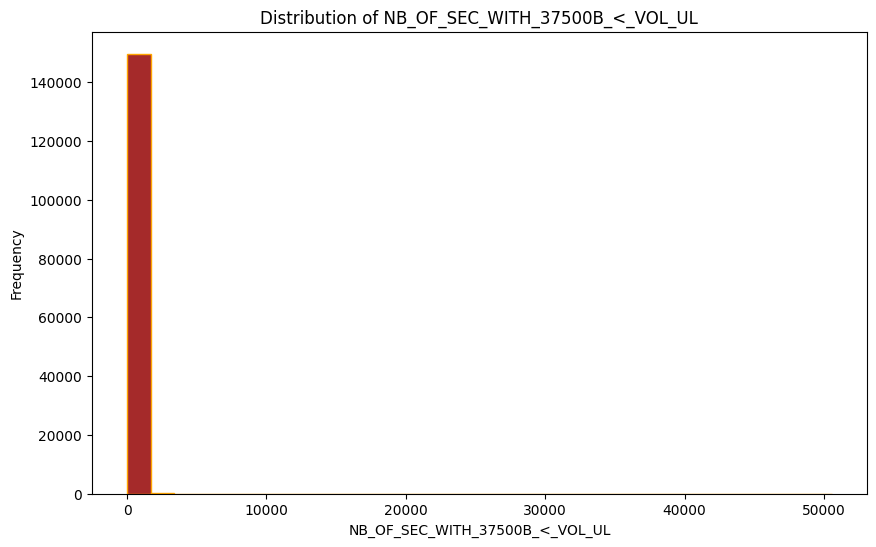

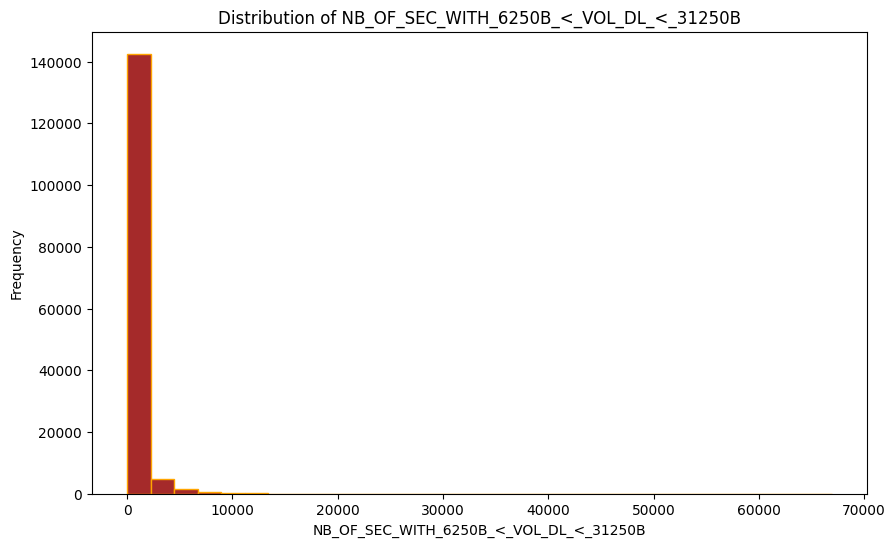

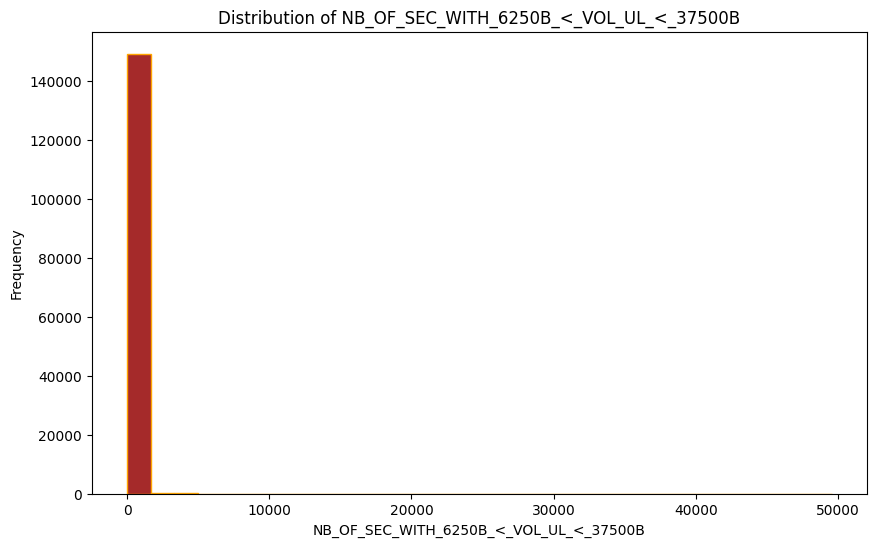

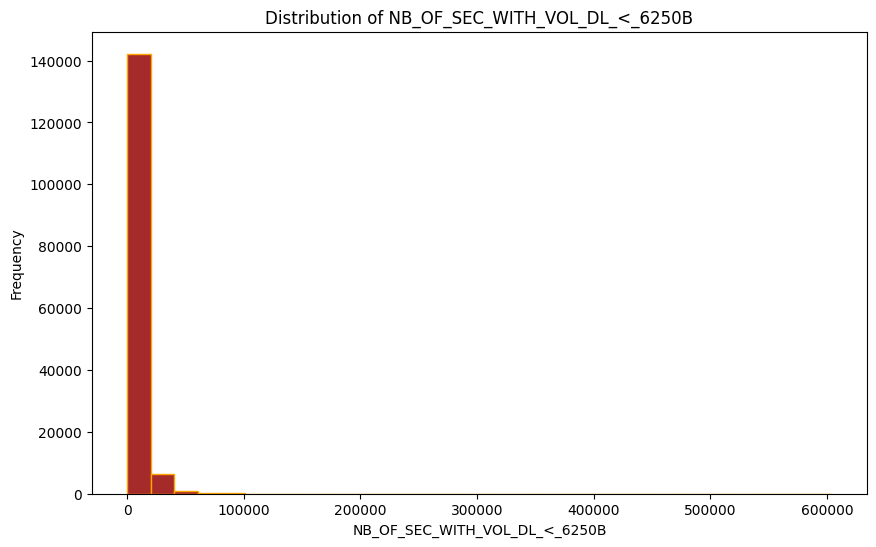

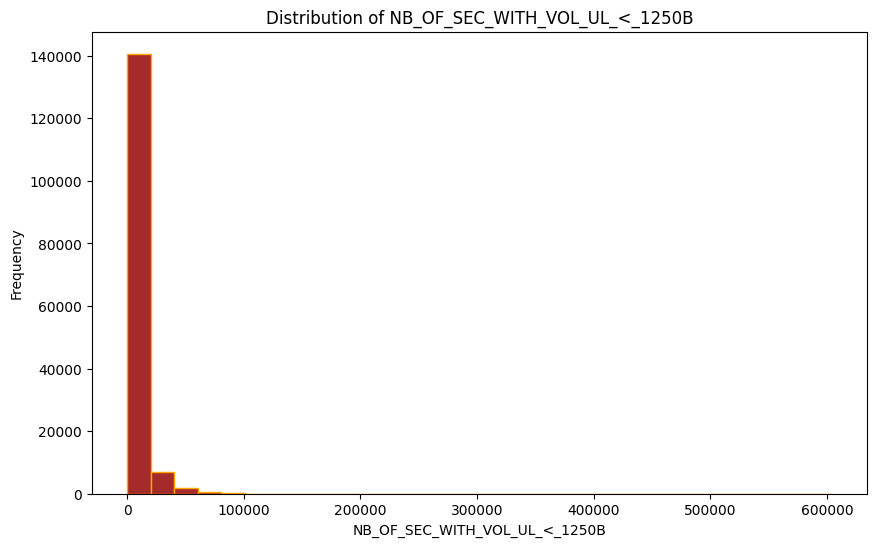

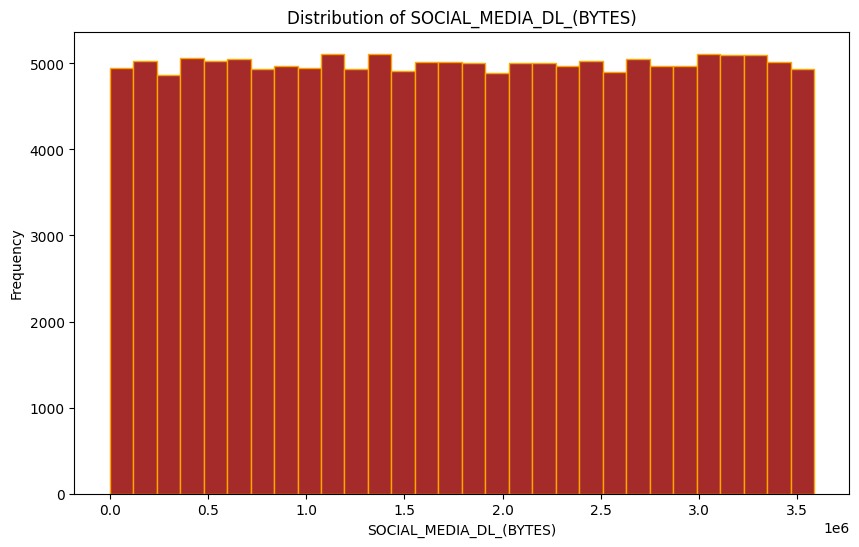

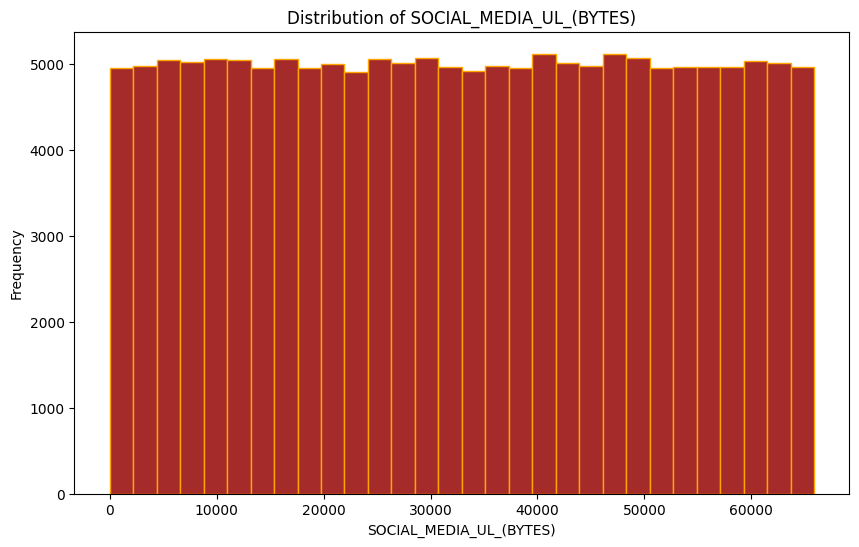

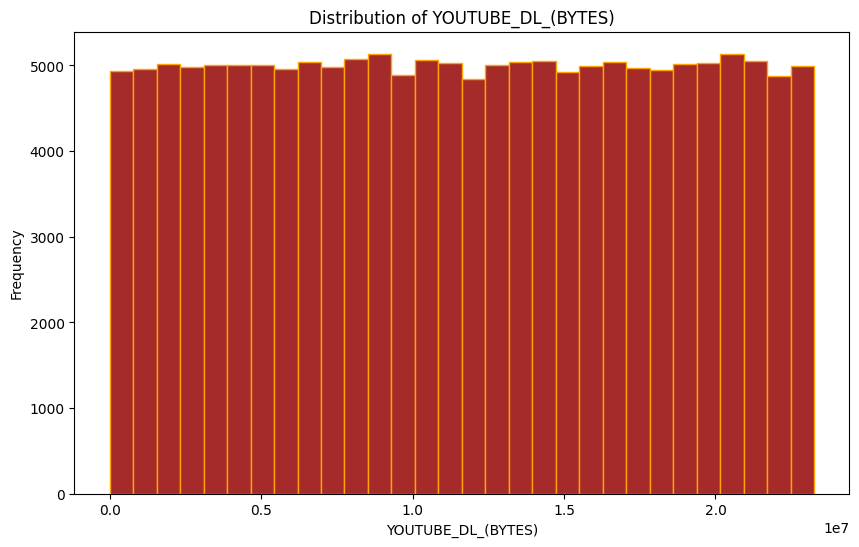

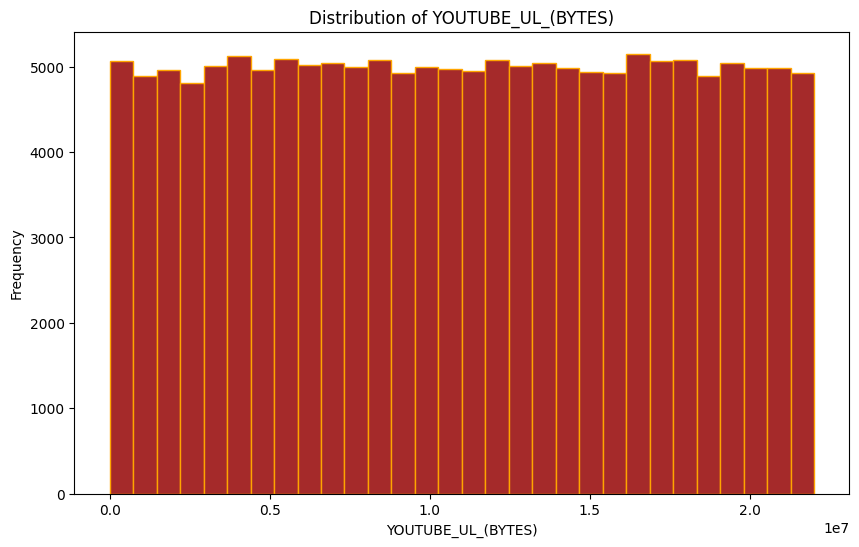

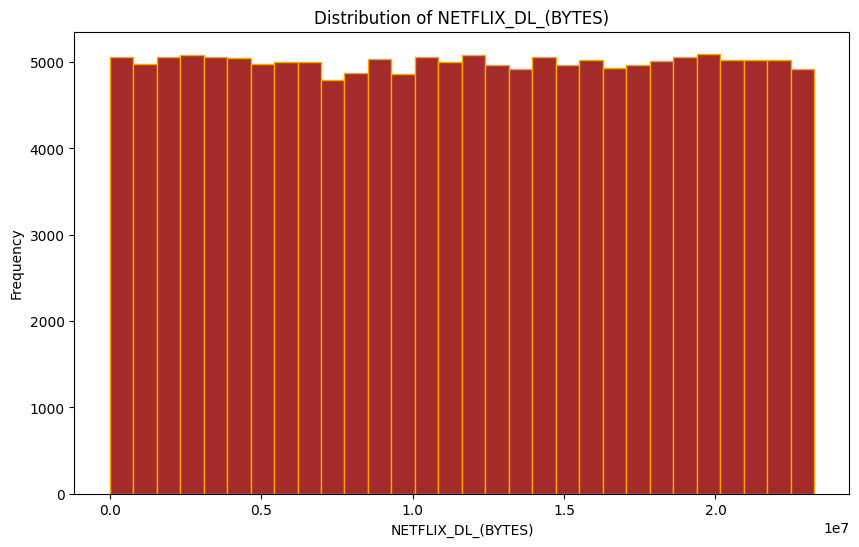

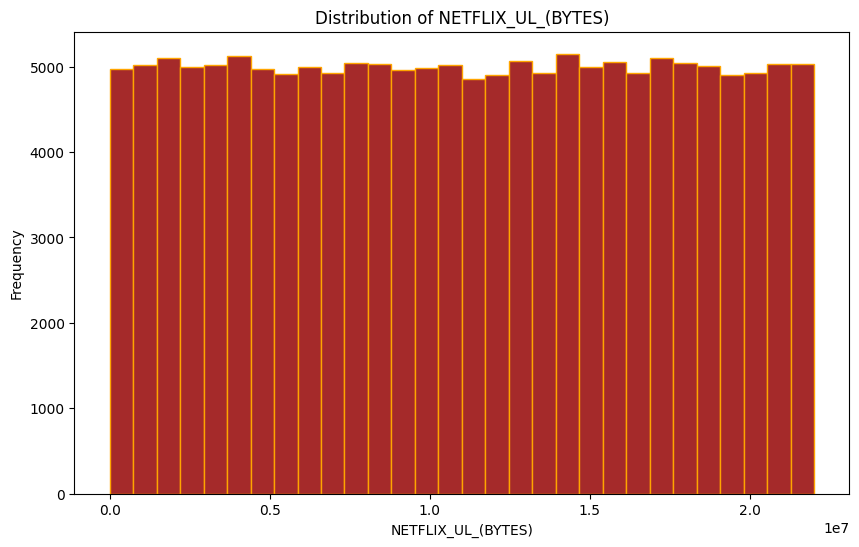

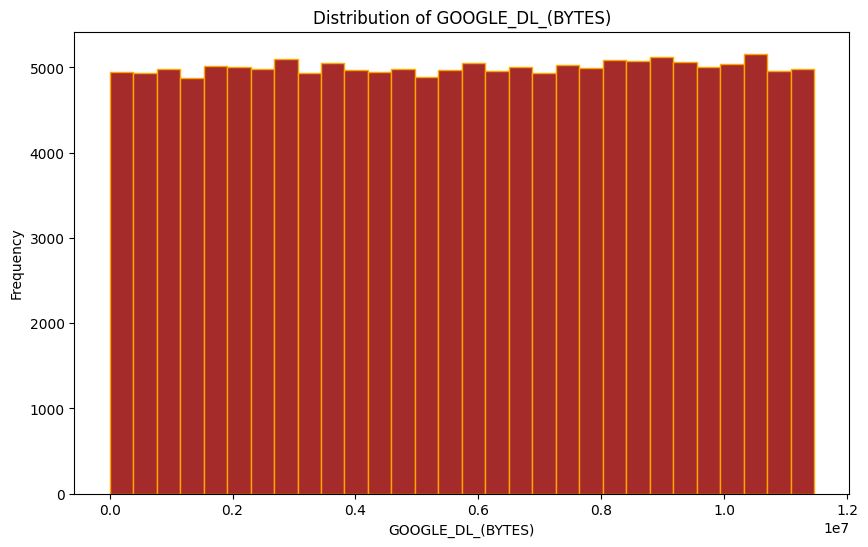

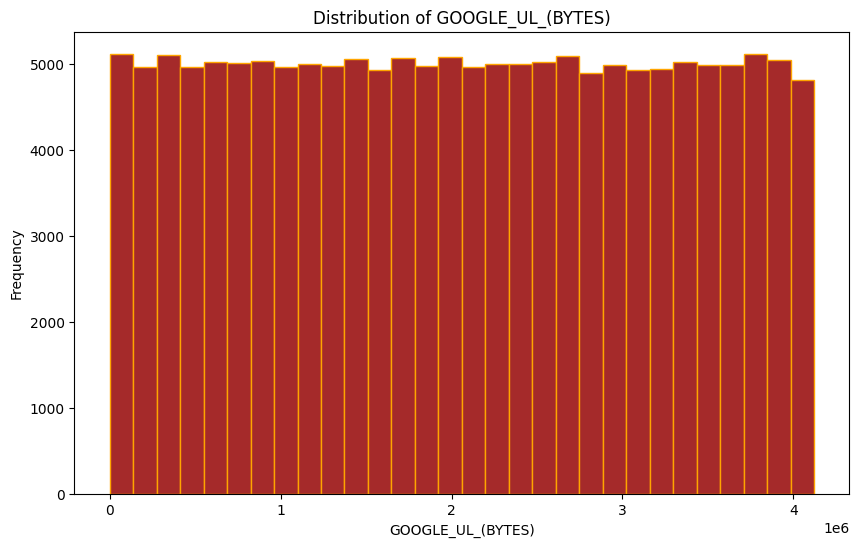

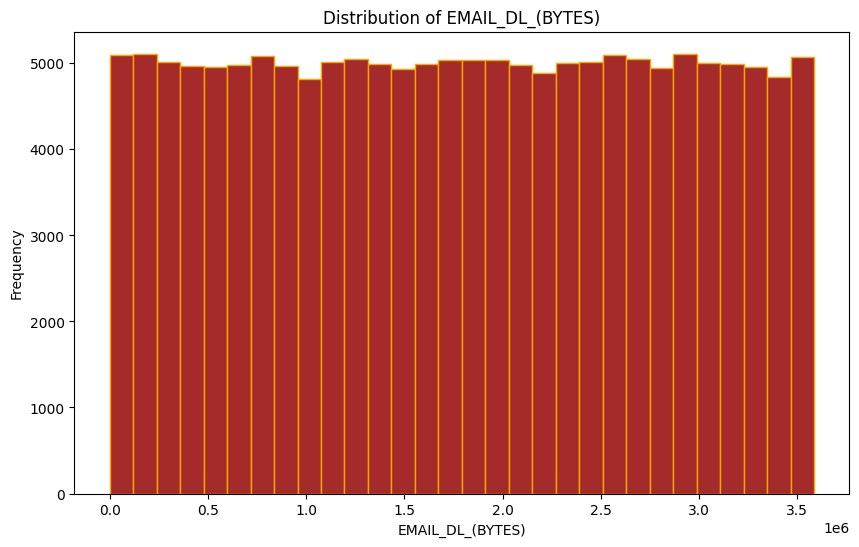

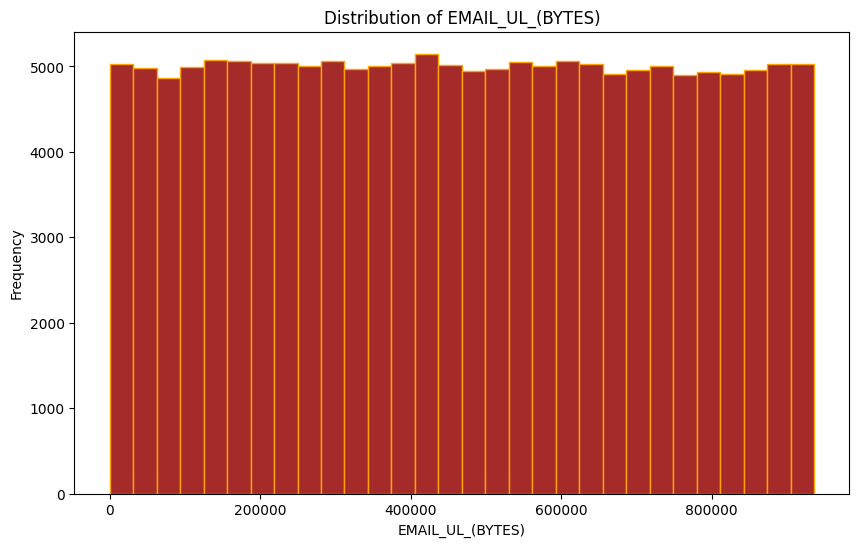

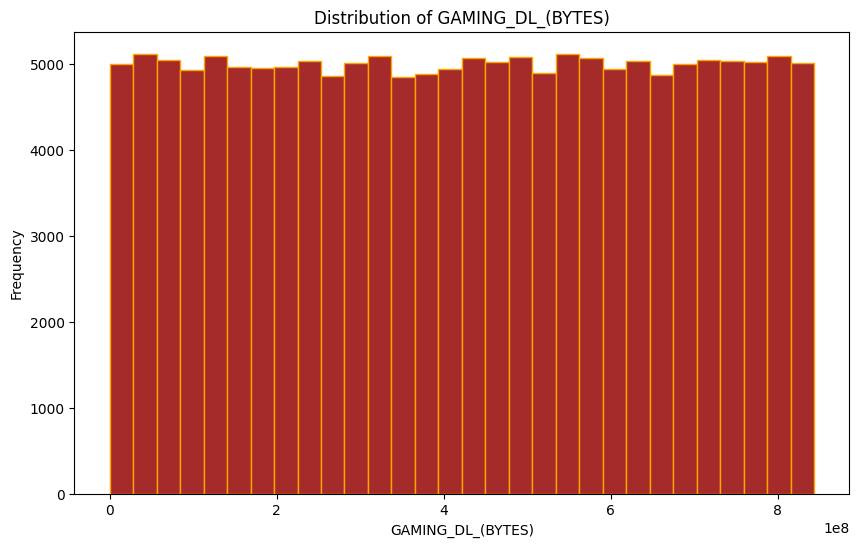

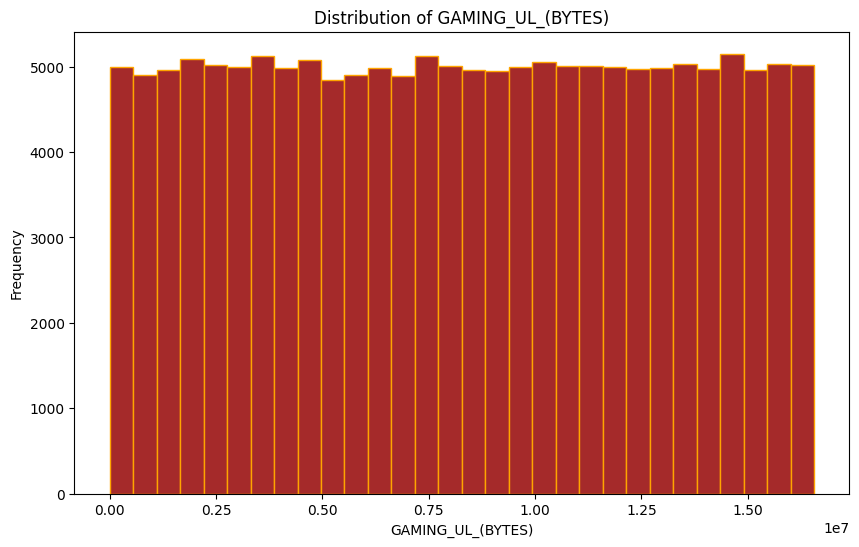

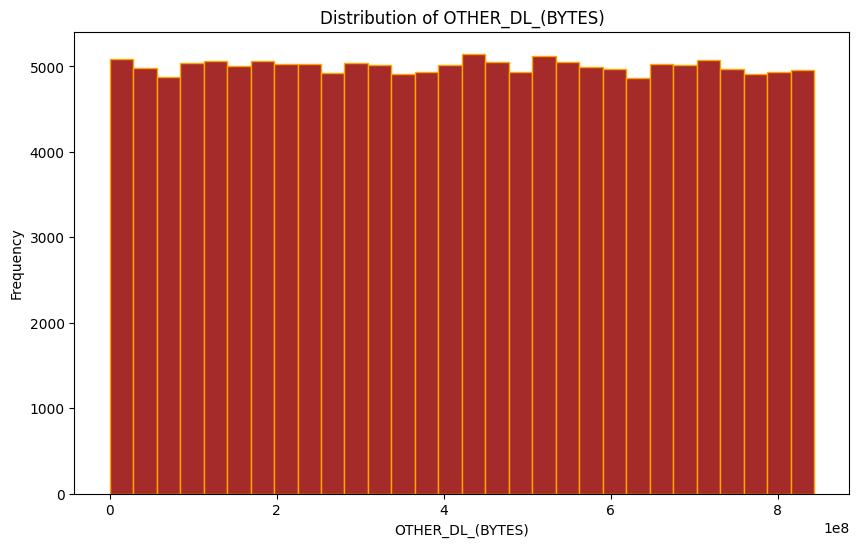

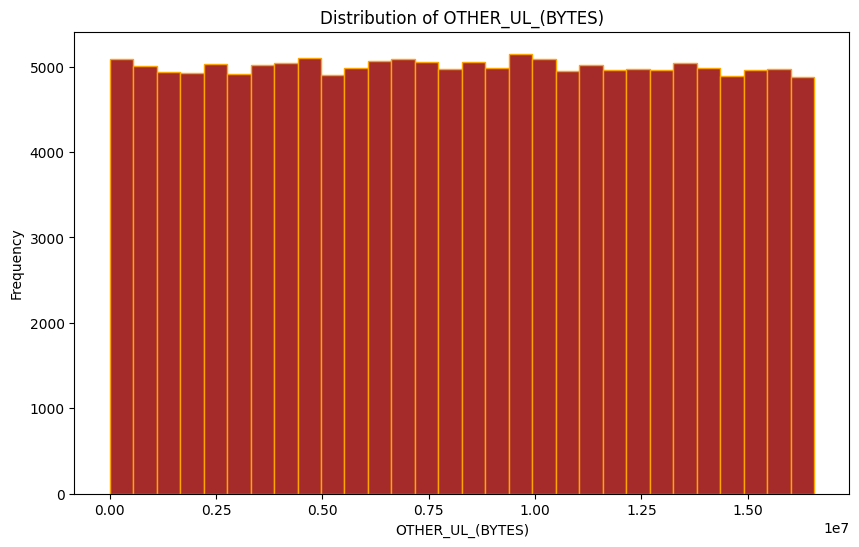

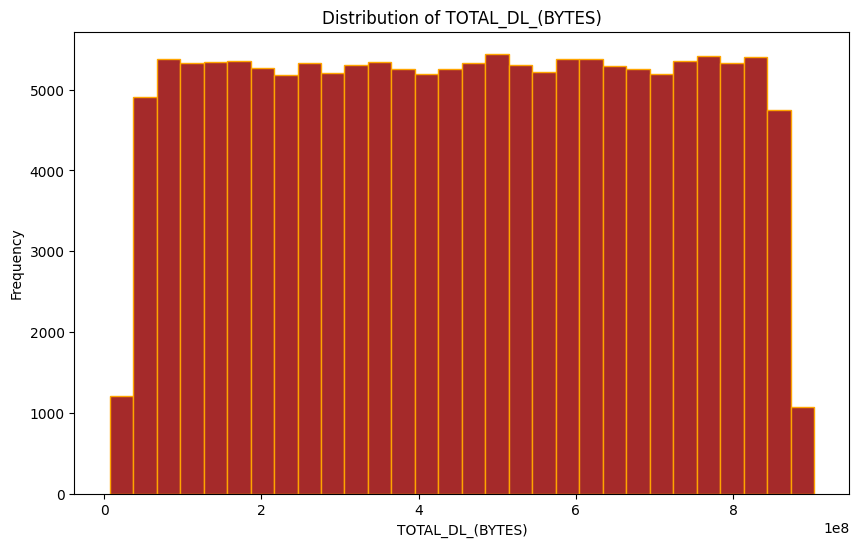

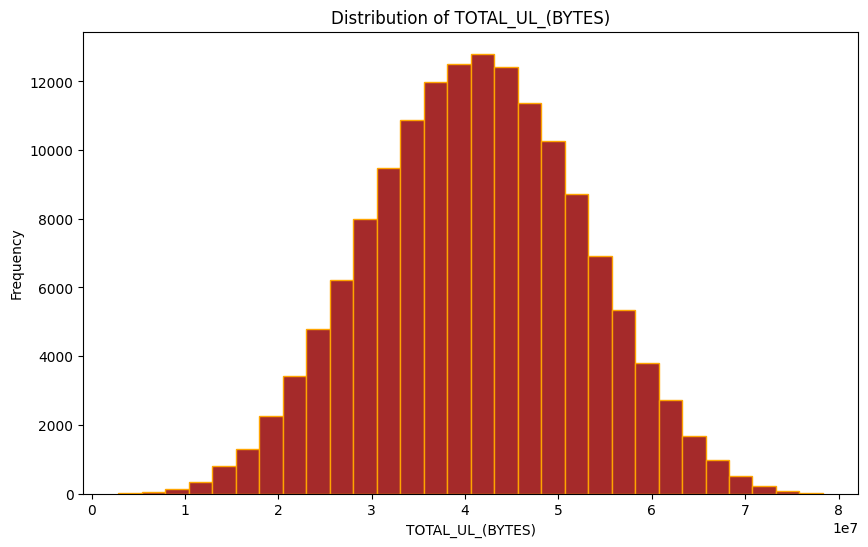

In [14]:
# List of columns for graphical analysis
columns_for_graphical_analysis = [
    'DUR._(MS)', 'AVG_RTT_DL_(MS)', 'AVG_RTT_UL_(MS)', 'AVG_BEARER_TP_DL_(KBPS)',
    'AVG_BEARER_TP_UL_(KBPS)', 'TCP_DL_RETRANS._VOL_(BYTES)', 'TCP_UL_RETRANS._VOL_(BYTES)',
    'DL_TP_<_50_KBPS_(%)', '50_KBPS_<_DL_TP_<_250_KBPS_(%)', '250_KBPS_<_DL_TP_<_1_MBPS_(%)',
    'DL_TP_>_1_MBPS_(%)', 'UL_TP_<_10_KBPS_(%)', '10_KBPS_<_UL_TP_<_50_KBPS_(%)',
    '50_KBPS_<_UL_TP_<_300_KBPS_(%)', 'UL_TP_>_300_KBPS_(%)', 'ACTIVITY_DURATION_DL_(MS)',
    'ACTIVITY_DURATION_UL_(MS)', 'NB_OF_SEC_WITH_125000B_<_VOL_DL',
    'NB_OF_SEC_WITH_1250B_<_VOL_UL_<_6250B', 'NB_OF_SEC_WITH_31250B_<_VOL_DL_<_125000B',
    'NB_OF_SEC_WITH_37500B_<_VOL_UL', 'NB_OF_SEC_WITH_6250B_<_VOL_DL_<_31250B',
    'NB_OF_SEC_WITH_6250B_<_VOL_UL_<_37500B', 'NB_OF_SEC_WITH_VOL_DL_<_6250B',
    'NB_OF_SEC_WITH_VOL_UL_<_1250B', 'SOCIAL_MEDIA_DL_(BYTES)', 'SOCIAL_MEDIA_UL_(BYTES)',
    'YOUTUBE_DL_(BYTES)', 'YOUTUBE_UL_(BYTES)', 'NETFLIX_DL_(BYTES)', 'NETFLIX_UL_(BYTES)',
    'GOOGLE_DL_(BYTES)', 'GOOGLE_UL_(BYTES)', 'EMAIL_DL_(BYTES)', 'EMAIL_UL_(BYTES)',
    'GAMING_DL_(BYTES)', 'GAMING_UL_(BYTES)', 'OTHER_DL_(BYTES)', 'OTHER_UL_(BYTES)',
    'TOTAL_DL_(BYTES)', 'TOTAL_UL_(BYTES)'
]

# Graphical Univariate Analysis
for column in columns_for_graphical_analysis:
    plt.figure(figsize=(10, 6))

    # Selecting appropriate plot type based on data type
    if cleaned_df[column].dtype in [np.int64, np.float64]:
        # Histogram for numeric columns
        plt.hist(df[column], bins=30, color='brown', edgecolor='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    elif cleaned_df[column].dtype == np.object:
        # Bar plot for categorical columns
        sns.countplot(x=df[column], order=df[column].value_counts().index, palette='viridis')
        plt.title(f'Count of Users by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.show()